In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import os

sns.set()

from function_analisi import *

os.chdir('/Users/matteo/Desktop/iottacle/jupyter/dati_fattore_mac')

#### Dati visite 

Dato Mac --> Numero di Mac Address unici contati nel tempo
Dato Raw --> Numero di Raw Count contati nel tempo

    - Cella 1: Dati mac 'rumore' RawCount=1, VisitDuration < 1000 ms
    - Cella 2: Dati mac 'visits' AvgSS>-74, VisitDuration > 1000 ms
    - Cella 3: Conteggio numero totale di mac address in una settimana in funzione dei filtri
    - Cella 4: Dati raw, 'rumore' VisitDuration < 1000 ms 
    - Cella 5: Dati raw, 'visita' VisitDuration < 6 h

Dati settimanali
intercept: -140.41  coef 0.94
Pearson Correlation Coefficient: 0.9970 and a P-value of: 4.893306586635949e-216
---------------------------
Conteggi e frequenze
sum random: 433580.00 sum non random: 492350.00
freq h random: 2580.83 freq h non random: 2930.65
freq min random: 43.01 freq min non random: 48.84
---------------------------
Dati mediati nella settimana
intercept: -14.54  coef 0.89
Pearson Correlation Coefficient: 0.9973 and a P-value of: 1.7689654765442832e-26


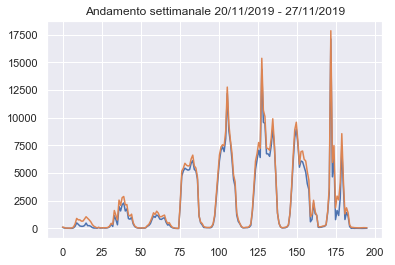

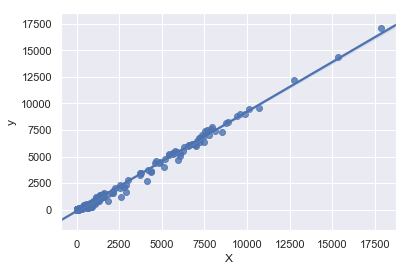

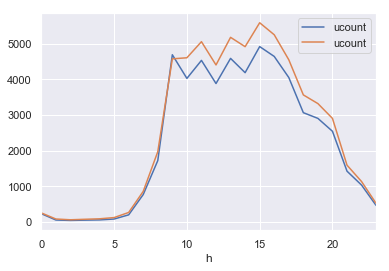

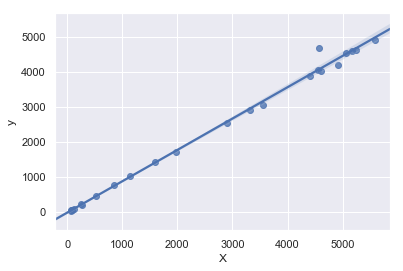

In [2]:
# Andamento dati 'rumore' raw count uguale a uno, durata minore di un secondo

df           = pd.read_csv('csv_rumore.txt')
df, dft, dff = organize(df,plot=False)

plt.plot(np.linspace(start=0, num=dft.ucount.values.shape[0], stop= dft.ucount.values.shape[0]),dft.ucount.values )
plt.plot(np.linspace(start=0, num=dft.ucount.values.shape[0], stop= dft.ucount.values.shape[0]),dff.ucount.values[:-1] )
plt.title('Andamento settimanale 20/11/2019 - 27/11/2019')

plt.figure()
print('Dati settimanali')
reg_rt(y=dft.ucount.values, X=dff.ucount.values[:-1])

print('---------------------------')
print('Conteggi e frequenze')
print('sum random: {:.2f}'.format( np.sum(dft.ucount.values)),'sum non random: {:.2f}'.format( np.sum(dff.ucount.values)))
print('freq h random: {:.2f}'.format( np.sum(dft.ucount.values)/(7*24)),'freq h non random: {:.2f}'.format( np.sum(dff.ucount.values)/(7*24)))
print('freq min random: {:.2f}'.format( np.sum(dft.ucount.values)/(7*24*60)),'freq min non random: {:.2f}'.format( np.sum(dff.ucount.values)/(7*24*60)))
print('---------------------------')


dft = dft.groupby([dft.index.hour.rename('h'), dft.index.day.rename('d')])['ucount'].mean().reset_index()
dff = dff.groupby([dff.index.hour.rename('h'), dff.index.day.rename('d')])['ucount'].mean().reset_index()

del dft['d']
del dff['d']
 
tt  = dft.groupby('h').mean()
tf  = dff.groupby('h').mean()

ax1 = tt.plot()
tf.plot(ax=ax1)

X = tt.ucount.values
y = tf.ucount.values

plt.figure()
print('Dati mediati nella settimana')
reg_rt(X=y,y=X)

Dati settimanali
intercept: 31.90  coef 0.36
Pearson Correlation Coefficient: 0.9774 and a P-value of: 1.7262707935464988e-129
---------------------------
Conteggi e frequenze
sum random: 27060.00 sum non random: 57882.00
freq h random: 161.07 freq h non random: 344.54
freq min random: 2.68 freq min non random: 5.74
---------------------------
Dati mediati nella settimana
intercept: 33.82  coef 0.36
Pearson Correlation Coefficient: 0.9944 and a P-value of: 6.048023715432102e-23


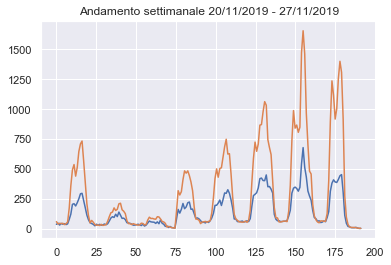

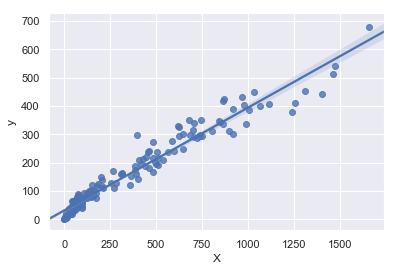

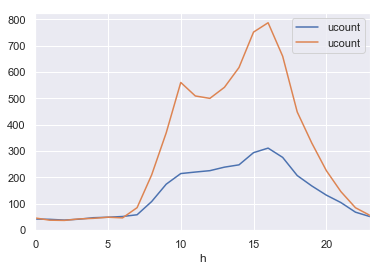

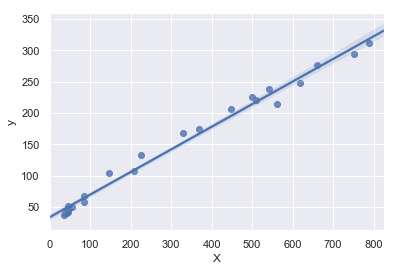

In [23]:
# Andamento dati 'visits' durata maggiore di un secondo avgss > -74

df           = pd.read_csv('csv_visits.txt')
df, dft, dff = organize(df,plot=False)

plt.plot(np.linspace(start=0, num=dft.ucount.values.shape[0], stop= dft.ucount.values.shape[0]),dft.ucount.values )
plt.plot(np.linspace(start=0, num=dft.ucount.values.shape[0], stop= dft.ucount.values.shape[0]),dff.ucount.values[:191] )
plt.title('Andamento settimanale 20/11/2019 - 27/11/2019')

plt.figure()
print('Dati settimanali')
reg_rt(y=dft.ucount.values, X=dff.ucount.values[:191])

print('---------------------------')
print('Conteggi e frequenze')
print('sum random: {:.2f}'.format( np.sum(dft.ucount.values)),'sum non random: {:.2f}'.format( np.sum(dff.ucount.values)))
print('freq h random: {:.2f}'.format( np.sum(dft.ucount.values)/(7*24)),'freq h non random: {:.2f}'.format( np.sum(dff.ucount.values)/(7*24)))
print('freq min random: {:.2f}'.format( np.sum(dft.ucount.values)/(7*24*60)),'freq min non random: {:.2f}'.format( np.sum(dff.ucount.values)/(7*24*60)))
print('---------------------------')


dft = dft.groupby([dft.index.hour.rename('h'), dft.index.day.rename('d')])['ucount'].mean().reset_index()
dff = dff.groupby([dff.index.hour.rename('h'), dff.index.day.rename('d')])['ucount'].mean().reset_index()

del dft['d']
del dff['d']
 
tt  = dft.groupby('h').mean()
tf  = dff.groupby('h').mean()

ax1 = tt.plot()
tf.plot(ax=ax1)

X = tt.ucount.values
y = tf.ucount.values

plt.figure()
print('Dati mediati nella settimana')
reg_rt(X=y,y=X)

#### Dati Settimanali: from 20/11/2019 00:00 to 27/11/2019 00:00
-------------------
    frequenza al minuto filtri:  No filtri
        Random       72.82
        Non_Random   83.41
-------------------
    frequenza al minuto filtri:  VisitDuration 1000 to inf
        Random       12.74
        Non_Random   20.88
-------------------
    frequenza al minuto filtri:  VisitDuration 1000 to 5m
        Random       11.88
        Non_Random   16.08
-------------------
    frequenza al minuto filtri:    VisitDuration 5m   to 60m
        Random       0.92
        Non_Random   6.04
-------------------
    frequenza al minuto filtri:  VisitDuration 0    to 1000
        Random       60.72
        Non_Random   65.27
        
-------------------

#### Dati Giornalieri: from 20/11/2019 00:00 to 21/11/2019 00:00
-------------------
    frequenza al minuto filtri:  No filtri
        Random       109.63
        Non_Random   119.95
-------------------
    frequenza al minuto filtri:   VisitDuration 1000 to inf
        Random       13.47
        Non_Random   22.80
-------------------
    frequenza al minuto filtri:   VisitDuration 1000 to 5m
        Random       12.89
        Non_Random   17.23
-------------------
    frequenza al minuto filtri:    VisitDuration 5m   to 60m
        Random       6.57
        Non_Random   0.86
-------------------
    frequenza al minuto filtri:  VisitDuration 0    to 1000
        Random       96.40
        Non_Random   100.73

intercept: 525.05  coef 1.01
Pearson Correlation Coefficient: 0.9973 and a P-value of: 9.88226349129205e-190

--------------------------------
--- Frequenza Raw Data Count ---
sum non random: 1669344.00 sum random: 1569517.00
freq h non random: 9936.57 freq h random: 9342.36
freq min non random: 165.61 freq min random: 155.71
--------------------------------

intercept: 288.76  coef 1.03
Pearson Correlation Coefficient: 0.9984 and a P-value of: 4.886890992534286e-29


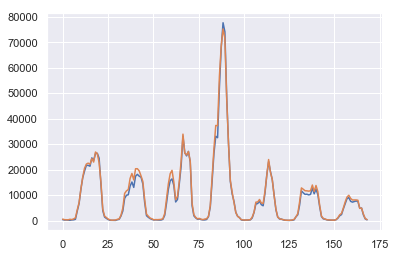

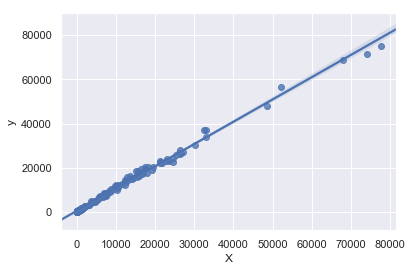

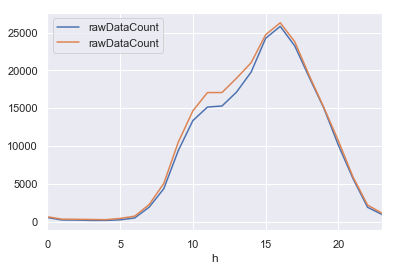

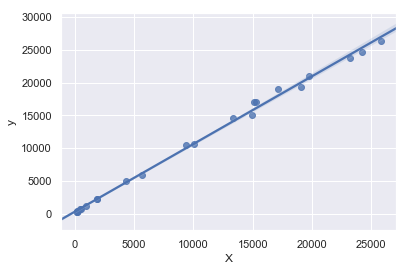

In [24]:
df           = pd.read_csv('csv_under1000.txt')
df, dft, dff = organize(df, plot=False)

plt.plot(np.linspace(start=0, num=dft.rawDataCount.values.shape[0] , stop= dft.rawDataCount.values.shape[0] ),dft.rawDataCount.values )
plt.plot(np.linspace(start=0, num=dff.rawDataCount.values.shape[0] , stop= dff.rawDataCount.values.shape[0] ),dff.rawDataCount.values )

plt.figure()
reg_rt(X=dft.rawDataCount.values, y=dff.rawDataCount.values)

print('\n--------------------------------')
print('--- Frequenza Raw Data Count ---')
print('sum non random: {:.2f}'.format( np.sum(dff.rawDataCount.values)),'sum random: {:.2f}'.format( np.sum(dft.rawDataCount.values)))
print('freq h non random: {:.2f}'.format( np.sum(dff.rawDataCount.values)/(7*24)),'freq h random: {:.2f}'.format( np.sum(dft.rawDataCount.values)/(7*24)))
print('freq min non random: {:.2f}'.format( np.sum(dff.rawDataCount.values)/(7*24*60)),'freq min random: {:.2f}'.format( np.sum(dft.rawDataCount.values)/(7*24*60)))
print('--------------------------------\n')


dft = dft.groupby([dft.index.hour.rename('h'), dft.index.day.rename('d')])['rawDataCount'].mean().reset_index()
dff = dff.groupby([dff.index.hour.rename('h'), dff.index.day.rename('d')])['rawDataCount'].mean().reset_index()

del dft['d']
del dff['d']
 
tt  = dft.groupby('h').mean()
tf  = dff.groupby('h').mean()

ax1 = tt.plot()
tf.plot(ax=ax1)

X = tt.rawDataCount.values
y = tf.rawDataCount.values

plt.figure()
reg_rt(X=X,y=y)



intercept: 7166.85  coef 1.83
Pearson Correlation Coefficient: 0.9510 and a P-value of: 1.4901444417882304e-86

--------------------------------
--- Frequenza Raw Data Count ---
sum non random: 5454199.00 sum random: 2326865.00
freq h non random: 32465.47 freq h random: 13850.39
freq min non random: 541.09 freq min random: 230.84
--------------------------------

intercept: 5311.41  coef 1.96
Pearson Correlation Coefficient: 0.9613 and a P-value of: 8.38102607421862e-14


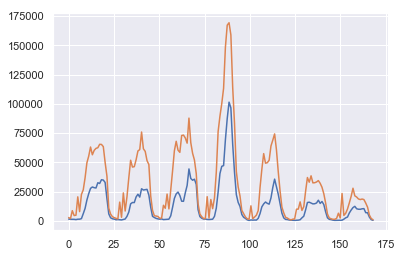

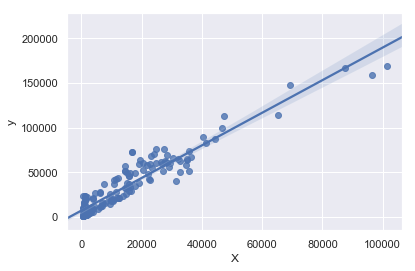

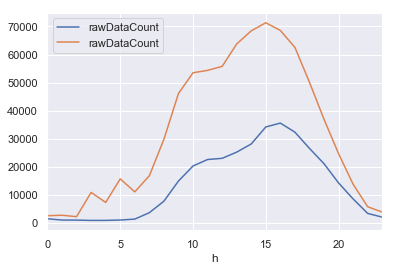

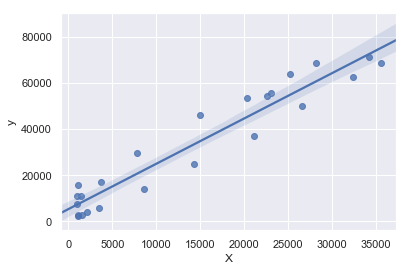

In [25]:
df           = pd.read_csv('csv_raw_under6h.csv')
df, dft, dff = organize(df, plot=False)

plt.plot(np.linspace(start=0, num=dft.rawDataCount.values.shape[0] , stop= dft.rawDataCount.values.shape[0] ),dft.rawDataCount.values )
plt.plot(np.linspace(start=0, num=dff.rawDataCount.values.shape[0] , stop= dff.rawDataCount.values.shape[0] ),dff.rawDataCount.values )

plt.figure()
reg_rt(X=dft.rawDataCount.values, y=dff.rawDataCount.values)

print('\n--------------------------------')
print('--- Frequenza Raw Data Count ---')
print('sum non random: {:.2f}'.format( np.sum(dff.rawDataCount.values)),'sum random: {:.2f}'.format( np.sum(dft.rawDataCount.values)))
print('freq h non random: {:.2f}'.format( np.sum(dff.rawDataCount.values)/(7*24)),'freq h random: {:.2f}'.format( np.sum(dft.rawDataCount.values)/(7*24)))
print('freq min non random: {:.2f}'.format( np.sum(dff.rawDataCount.values)/(7*24*60)),'freq min random: {:.2f}'.format( np.sum(dft.rawDataCount.values)/(7*24*60)))
print('--------------------------------\n')


dft = dft.groupby([dft.index.hour.rename('h'), dft.index.day.rename('d')])['rawDataCount'].mean().reset_index()
dff = dff.groupby([dff.index.hour.rename('h'), dff.index.day.rename('d')])['rawDataCount'].mean().reset_index()

del dft['d']
del dff['d']
 
tt  = dft.groupby('h').mean()
tf  = dff.groupby('h').mean()

ax1 = tt.plot()
tf.plot(ax=ax1)

X = tt.rawDataCount.values
y = tf.rawDataCount.values

plt.figure()
reg_rt(X=X,y=y)



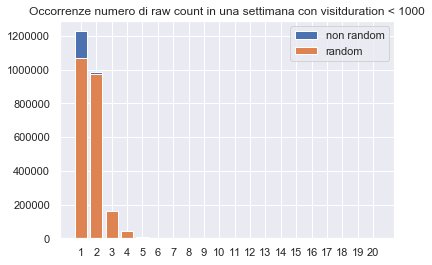

In [26]:
df           = pd.read_csv('csv_hist_under1000.txt')

del df['rand_1']

dft = df[df['rand'] == True]
dff = df[df['rand'] == False]

del dft['rand']
del dff['rand']

plt.bar(dff.rawDataCount.values,dff.Count.values, label='non random')
plt.bar(dft.rawDataCount.values,dft.Count.values, label='random')

plt.xticks(dft.rawDataCount.values)
plt.legend()
plt.title('Occorrenze numero di raw count in una settimana con visitduration < 1000')
print('')

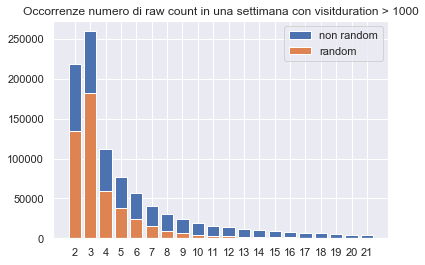

In [27]:
df           = pd.read_csv('csv_hist_over1000.txt')

del df['rand_1']

dft = df[df['rand'] == True]
dff = df[df['rand'] == False]

del dft['rand']
del dff['rand']

plt.bar(dff.rawDataCount.values,dff.Count.values, label='non random')
plt.bar(dft.rawDataCount.values,dft.Count.values, label='random')

plt.xticks(dft.rawDataCount.values)
plt.legend()
plt.title('Occorrenze numero di raw count in una settimana con visitduration > 1000')

print('')
